C:\Users\Marcio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


               precision    recall  f1-score   support

    Concluído       0.51      0.55      0.53      2988
Não concluído       0.51      0.46      0.48      3012

     accuracy                           0.51      6000
    macro avg       0.51      0.51      0.51      6000
 weighted avg       0.51      0.51      0.51      6000



C:\Users\Marcio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


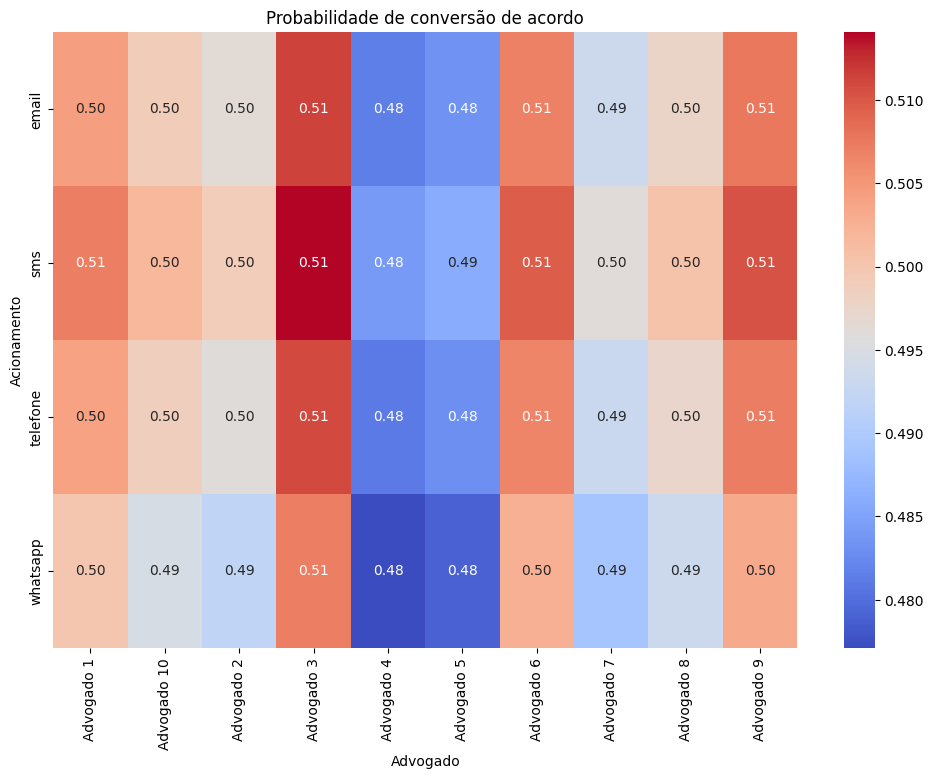

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Criação do DataFrame fictício
n_samples = 20000
acionamento = np.random.choice(['whatsapp', 'sms', 'email', 'telefone'], n_samples)
advogado = np.random.choice(['Advogado 1', 'Advogado 2', 'Advogado 3', 'Advogado 4', 'Advogado 5',
                              'Advogado 6', 'Advogado 7', 'Advogado 8', 'Advogado 9', 'Advogado 10'], n_samples)
status_do_acordo = np.random.choice(['Concluído', 'Não concluído'], n_samples)

df = pd.DataFrame({'acionamento': acionamento, 'advogado': advogado, 'status_do_acordo': status_do_acordo})

# Pré-processamento dos dados
X = df[['acionamento', 'advogado']]
y = df['status_do_acordo']

# Transformação das variáveis categóricas em numéricas
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Treinamento do modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Previsão das probabilidades de conversão de acordo
combinacoes = []
for ac in ['whatsapp', 'sms', 'email', 'telefone']:
    for adv in ['Advogado 1', 'Advogado 2', 'Advogado 3', 'Advogado 4', 'Advogado 5', 'Advogado 6', 'Advogado 7', 'Advogado 8', 'Advogado 9', 'Advogado 10']:
        combinacoes.append([ac, adv])

combinacoes_encoded = encoder.transform(combinacoes)
probabilidades = model.predict_proba(combinacoes_encoded)

# Criação do gráfico
prob_df = pd.DataFrame(probabilidades, columns=['Não Concluído', 'Concluído'])
prob_df['acionamento'] = [c[0] for c in combinacoes]
prob_df['advogado'] = [c[1] for c in combinacoes]
prob_df = prob_df.pivot(index='acionamento', columns='advogado', values='Concluído')

plt.figure(figsize=(12, 8))
sns.heatmap(prob_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Probabilidade de conversão de acordo')
plt.xlabel('Advogado')
plt.ylabel('Acionamento')
plt.show()


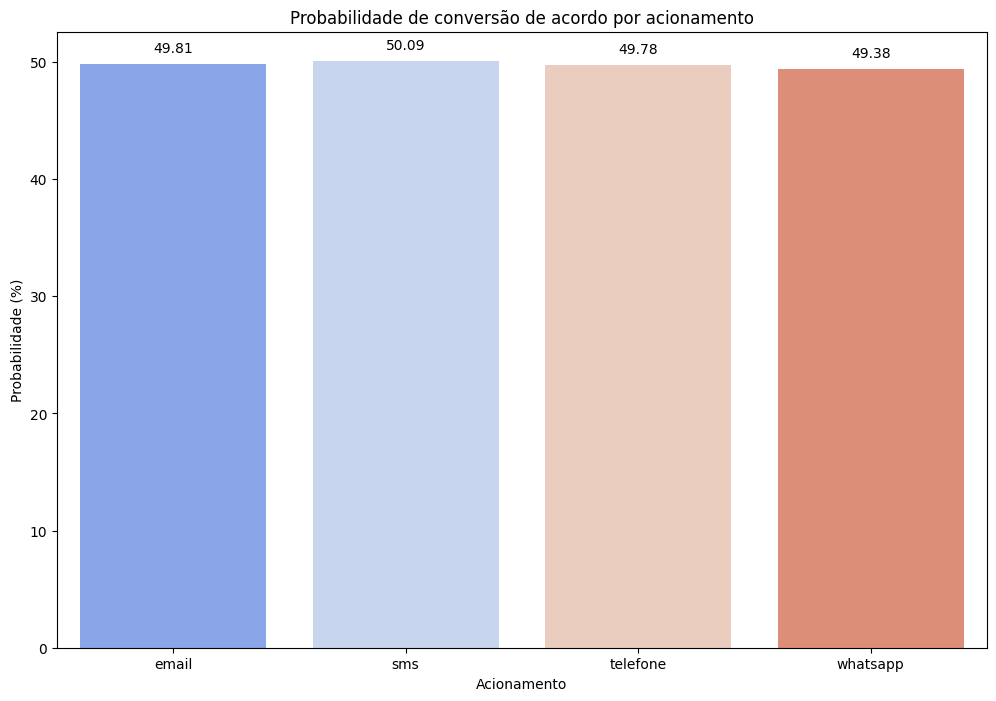

In [16]:
prob_acionamento = prob_df.mean(axis=1).reset_index()
prob_acionamento.columns = ['acionamento', 'probabilidade']
prob_acionamento['probabilidade'] = prob_acionamento['probabilidade']*100

plt.figure(figsize=(12, 8))
sns.barplot(x='acionamento', y='probabilidade', data=prob_acionamento, palette='coolwarm')
plt.title('Probabilidade de conversão de acordo por acionamento')
plt.xlabel('Acionamento')
plt.ylabel('Probabilidade (%)')
for i in range(prob_acionamento.shape[0]):
    plt.text(i, prob_acionamento['probabilidade'][i]+1, round(prob_acionamento['probabilidade'][i], 2), ha='center')
plt.show()




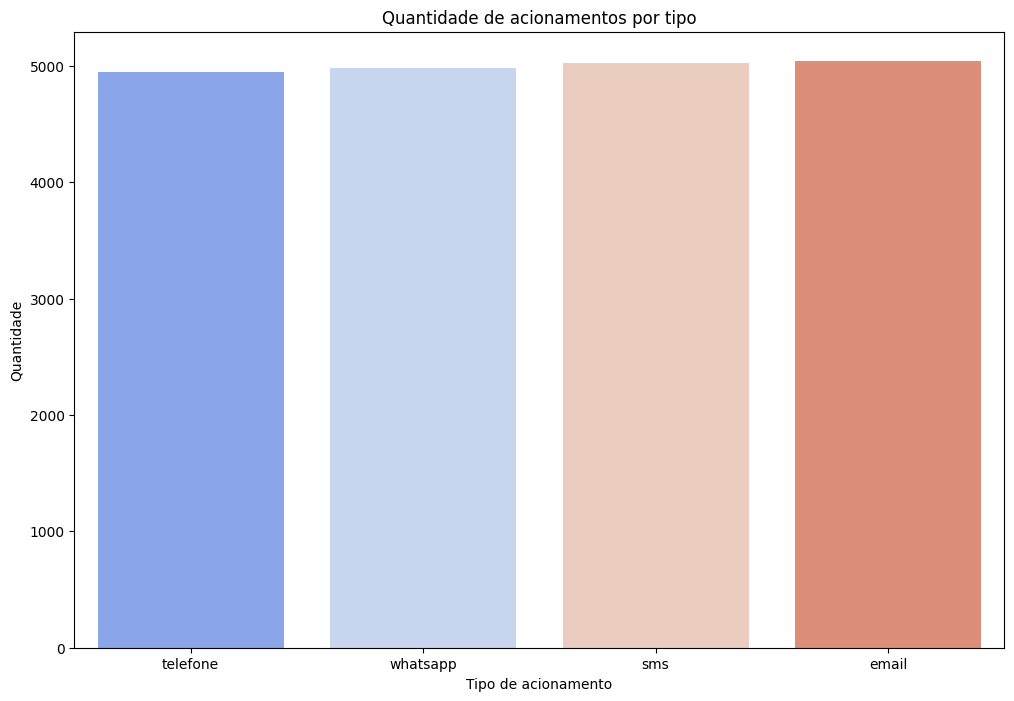

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(x='acionamento', data=df, palette='coolwarm')
plt.title('Quantidade de acionamentos por tipo')
plt.xlabel('Tipo de acionamento')
plt.ylabel('Quantidade')
plt.show()


In [31]:
df

,acionamento,advogado,status_do_acordo
0,telefone,Advogado 10,Concluído
1,whatsapp,Advogado 10,Não concluído
2,sms,Advogado 5,Não concluído
3,sms,Advogado 7,Não concluído
4,email,Advogado 7,Concluído
...,...,...,...
19995,whatsapp,Advogado 1,Não concluído
19996,whatsapp,Advogado 3,Concluído
19997,telefone,Advogado 6,Não concluído
19998,whatsapp,Advogado 1,Concluído


C:\Users\Marcio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              precision    recall  f1-score   support

   Concluído       0.32      0.08      0.13      1974
  Em Contato       0.35      0.34      0.35      2072
    Retirado       0.33      0.59      0.42      1954

    accuracy                           0.34      6000
   macro avg       0.34      0.34      0.30      6000
weighted avg       0.34      0.34      0.30      6000



C:\Users\Marcio\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


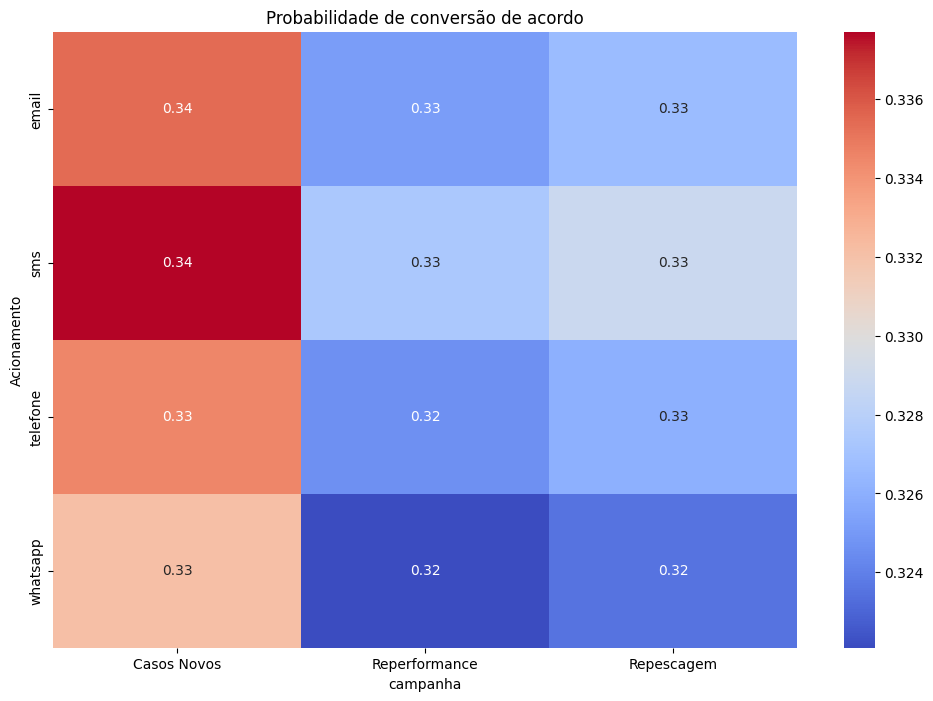

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Criação do DataFrame fictício
n_samples = 20000
acionamento = np.random.choice(['whatsapp', 'sms', 'email', 'telefone'], n_samples)
campanha = np.random.choice(['Repescagem', 'Casos Novos', 'Reperformance'], n_samples)
status_do_acordo = np.random.choice(['Concluído', 'Em Contato', 'Retirado'], n_samples)

df = pd.DataFrame({'acionamento': acionamento, 'campanha': campanha, 'status_do_acordo': status_do_acordo})

# Pré-processamento dos dados
X = df[['acionamento', 'campanha']]
y = df['status_do_acordo']

# Transformação das variáveis categóricas em numéricas
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Treinamento do modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliação do modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Previsão das probabilidades de conversão de acordo
combinacoes = []
for ac in ['whatsapp', 'sms', 'email', 'telefone']:
    for adv in ['Repescagem', 'Casos Novos', 'Reperformance']:
        combinacoes.append([ac, adv])

combinacoes_encoded = encoder.transform(combinacoes)
probabilidades = model.predict_proba(combinacoes_encoded)

# Criação do gráfico
prob_df = pd.DataFrame(probabilidades, columns=['Concluído', 'Em Contato', 'Retirado'])
prob_df['acionamento'] = [c[0] for c in combinacoes]
prob_df['campanha'] = [c[1] for c in combinacoes]
prob_df = prob_df.pivot(index='acionamento', columns='campanha', values='Concluído')

plt.figure(figsize=(12, 8))
sns.heatmap(prob_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Probabilidade de conversão de acordo')
plt.xlabel('campanha')
plt.ylabel('Acionamento')
plt.show()


In [11]:
df

,acionamento,campanha,status_do_acordo
0,whatsapp,Casos Novos,Concluído
1,whatsapp,Reperformance,Retirado
2,whatsapp,Reperformance,Em Contato
3,sms,Repescagem,Retirado
4,email,Reperformance,Concluído
...,...,...,...
19995,whatsapp,Repescagem,Concluído
19996,whatsapp,Repescagem,Retirado
19997,whatsapp,Reperformance,Concluído
19998,whatsapp,Casos Novos,Retirado
